In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
e2e_result_dir="e2e_result/"
fcfs_result_name="vllm-2000.0qps-Llama-2-13b-chat-hf-20240618-090050-fcfs.json"
infer_result_name="vllm-2000.0qps-Llama-2-13b-chat-hf-20240618-090617-infer.json"

In [3]:
fcfs_result=json.load(open(e2e_result_dir+fcfs_result_name))
infer_result=json.load(open(e2e_result_dir+infer_result_name))

In [4]:
fcfs_latencies=fcfs_result["latencies"]
infer_latencies=infer_result["latencies"]
df = pd.DataFrame({"fcfs": fcfs_latencies, "infer": infer_latencies})
df_result=df.describe(percentiles=[0.5,0.95])

In [5]:
df_result

,fcfs,infer
count,2000.000000,2000.000000
mean,105.086382,122.456207
std,57.148842,72.234464
min,1.501217,1.899509
50%,102.731790,117.959543
95%,198.042510,237.886170
max,202.064411,242.370165


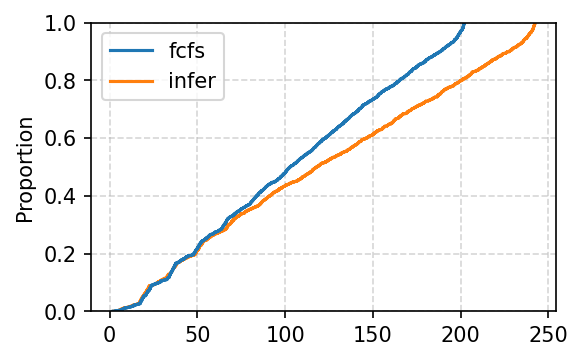

In [6]:
plt.figure(figsize=(4,2.5), dpi=150)
sns.ecdfplot(data=df)
plt.grid(alpha=0.5, linestyle="--")